Imports

In [0]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


4423680/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [0]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

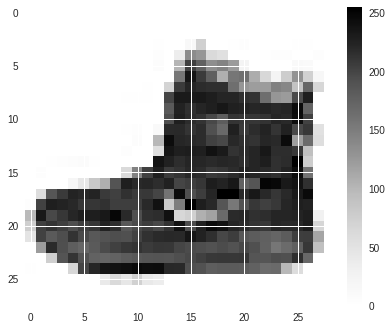

In [0]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [0]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [0]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 9120/48000 [====>.........................] - ETA: 7s - loss: 14.3826 - acc: 0.1052

KeyboardInterrupt: ignored

Sumário do modelo

In [0]:
sumario_do_modelo = modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [0]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.01211362, -0.17137007,  0.10023919, ...,  0.02132747,
         0.08510398, -0.01991926],
       [-0.03673006, -0.01121699,  0.18135728, ...,  0.07160602,
         0.02956759, -0.04133131],
       [ 0.00713112, -0.19251598,  0.38360998, ...,  0.22946052,
         0.2021512 , -0.06984136],
       ...,
       [ 0.04510833, -0.16854042,  0.19242138, ...,  0.01878942,
         0.026178  , -0.03602662],
       [-0.0349164 , -0.08771954,  0.08394209, ...,  0.02871951,
        -0.039045  ,  0.01397652],
       [-0.06163691, -0.05193904,  0.22838609, ...,  0.07752892,
         0.03038156, -0.06333628]], dtype=float32)

In [0]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)
'''

modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

modelo.layers[1].get_weights()


[array([[0.08686526, 0.80802226, 0.43332255, ..., 0.81448615, 0.7135337 ,
         0.14196502],
        [0.6456074 , 0.13445458, 0.6484802 , ..., 0.9712825 , 0.79914725,
         0.18689924],
        [0.63088703, 0.9008931 , 0.34802502, ..., 0.28477776, 0.48973653,
         0.58311546],
        ...,
        [0.62629074, 0.15910974, 0.3087878 , ..., 0.7260751 , 0.638582  ,
         0.525051  ],
        [0.04871938, 0.2518748 , 0.79640967, ..., 0.47279638, 0.41914734,
         0.7087251 ],
        [0.65979403, 0.9561557 , 0.00466026, ..., 0.20322262, 0.44446763,
         0.27175742]], dtype=float32),
 array([-0.01541583,  0.19773702,  0.34385112,  0.0626662 , -0.1144346 ,
        -0.02085753,  0.22603682,  0.20005977, -0.09590717,  0.08021583,
        -0.073163  ,  0.20876454,  0.30113217, -0.05427102,  0.01489063,
        -0.13720609,  0.24366179, -0.09445792,  0.20030072, -0.0274311 ,
        -0.1309959 ,  0.02205079, -0.01370528, -0.05685995,  0.40296167,
        -0.16657534,  0.13433

In [0]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 165us/step - loss: 13.3619 - acc: 0.1696 - val_loss: 13.1071 - val_acc: 0.1857
Epoch 2/5
48000/48000 [==============================] - 7s 152us/step - loss: 13.0232 - acc: 0.1916 - val_loss: 12.9066 - val_acc: 0.1993
Epoch 3/5
48000/48000 [==============================] - 7s 147us/step - loss: 12.9699 - acc: 0.1950 - val_loss: 12.8824 - val_acc: 0.2008
Epoch 4/5
48000/48000 [==============================] - 7s 147us/step - loss: 12.9288 - acc: 0.1977 - val_loss: 12.9194 - val_acc: 0.1983
Epoch 5/5
48000/48000 [==============================] - 7s 144us/step - loss: 12.9406 - acc: 0.1970 - val_loss: 12.9090 - val_acc: 0.1990


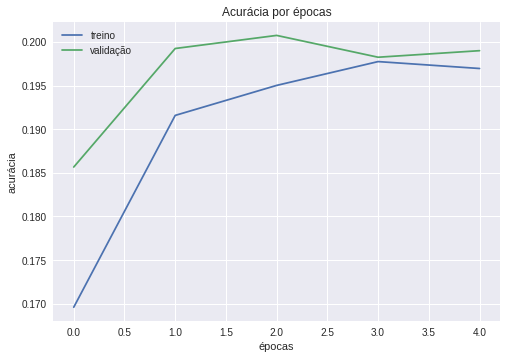

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


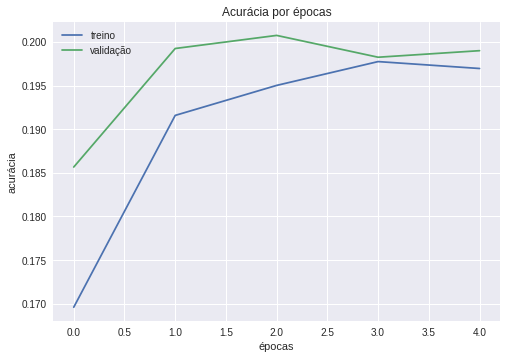

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [0]:
modelo.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config': {'dtype': 'float32'}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'dtype': 'float32', 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [0]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [0]:
vieses_camada_dense_zerados = np.zeros((256,))
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

Salvando e carregando o modelo treinado

In [0]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

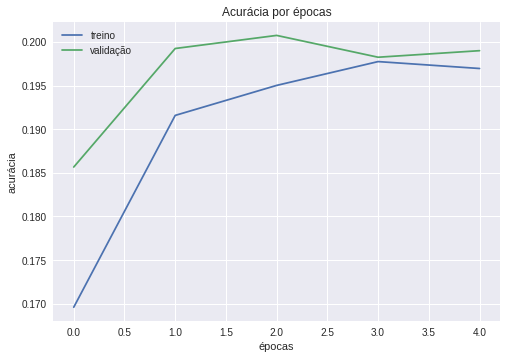

In [0]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

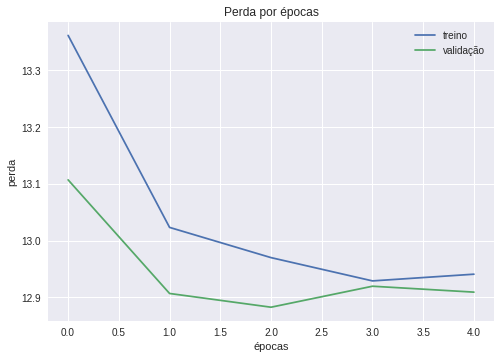

In [0]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [0]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 4
número da imagem de teste: 2
resultado teste modelo salvo: 4
número da imagem de teste: 2


Avaliando o modelo

In [0]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

10000/10000 [==============================] - 0s 32us/step
Perda do teste: 14.506285662841798
Acurácia do teste: 0.1
